In [97]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [98]:
# load train data
DATA_PATH = 'data'
df_path = os.path.join(DATA_PATH,'train.csv')
df = pd.read_csv(df_path, sep=',')

# load test data
test_data_path = os.path.join(DATA_PATH,'test.csv')
test_df = pd.read_csv(test_data_path, sep=',')

In [99]:
# train data EDA
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
# plot data by feature
# cleaned data requires different function to plot, test=True
def eda_plot_data(df, test=False):
    
    # Age in years
    print('Age')
    df['Age'].plot(kind='hist')
    plt.show()

    # Ticket class
    print('Pclass')
    df['Pclass'].plot(kind='hist')
    plt.show()

    # Sex
    print('Sex')
    if test:
        df['Sex'].plot(kind='hist')
        plt.show()
    else:
        df['Sex'].value_counts().plot(kind='bar')
        plt.show()

    # # of siblings / spouses aboard the Titanic
    print('SibSp')
    df['SibSp'].plot(kind='hist')
    plt.show()

    # # of parents / children aboard the Titanic	
    print('Parch')
    df['Parch'].plot(kind='hist')
    plt.show()

    # Passenger fare
    print('Fare')
    df['Fare'].plot(kind='hist')
    plt.show()

    # Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
    print('Embarked')
    if test:
        df['Embarked'].plot(kind='hist')
        plt.show()
    else:
        df['Embarked'].value_counts().plot(kind='bar')
        plt.show()

    # Ticket number
    print('Ticket')
    if test:
        df['Ticket'].plot(kind='hist')
        plt.show()
    else:
        df['Ticket'].value_counts().plot(kind='bar')
        plt.show()
    
    # Cabin number
    print('Cabin')
    if test:
        df['Cabin'].plot(kind='hist')
        plt.show()
    else:
        df['Cabin'].value_counts().plot(kind='bar')
        plt.show()



# Preprocess and clean data
def clean_df(df, test=False):
    
    # Drop PassengerId and Name
    df.drop('PassengerId', axis='columns', inplace=True)
    df.drop('Name', axis='columns', inplace=True)

    # Cabin dictionary, char to int
    cabin_dict = {
    'A':1,
    'B':2,
    'C':3,
    'D':4,
    'E':5,
    'F':6,
    'G':7,
    'H':8,
    'T':9
    }

    # Change cabin value just to numbers, ex.  B36 -> 236
    # Iterate by rows
    for c_i, cabin in enumerate(df['Cabin']):
        # Change only value with str datatype
        if not isinstance(cabin,str):
            continue
        # Iterate by row value
        for n_i ,char in enumerate(cabin):
            # Start iterating from last to first char
            index = -1 - n_i
            # If given char in cabin dictionary
            if cabin[index] in cabin_dict.keys():
                # Cabin letter to ID
                cabin_letter_id = str(cabin_dict[cabin[index]])
                # Cabin number
                cabin_number = str(df['Cabin'][c_i][index+1:])
                # If cabin number == cabin letter put empty value
                if cabin_number in cabin_dict.keys(): cabin_number = ''
                # Join letter with number and change that value in dataframe
                df.loc[c_i, 'Cabin'] =  int(cabin_letter_id + cabin_number)
                break

    # Change cabing datatype to float
    df['Cabin'] = (df['Cabin']).astype(float)

    # Change ticket value just to numbers
    # Iterate by rows
    for t_i, ticket in enumerate(df['Ticket']):
        # If ticket value == LINE change to 0
        if ticket == 'LINE':
            df.loc[t_i, 'Ticket'] = 0
        # Iterate by row value
        for c_i ,char in enumerate(ticket):
            # Start iterating from last to first char
            index = -1 - c_i
            # If whitespace found 
            if ticket[index] == ' ':
                # Change value to numbers after whitespace
                df.loc[t_i, 'Ticket'] = df['Ticket'][t_i][index+1:]   
                break
        continue

    # Reset dataframe indexing
    df.reset_index()

    # Embarked dictionary, char to int
    embarked_dict = {
    'C':0,
    'Q':1,
    'S':2
    }

    # Sex dictionary, str to int
    sex_dict = {
        'male':0,
        'female':1
    }

    # Replace values in dataframe with dictionaries
    df.replace({'Sex':sex_dict}, inplace=True)
    df.replace({'Embarked':embarked_dict}, inplace=True)

    # Fill na values with mean
    df.fillna(
                {
                'Age': df['Age'].mean(),
                'Cabin': df['Cabin'].mean(),
                'Embarked': df['Embarked'].mean()
                },
                inplace=True
                ) 
    
    # If training data save temporary column
    if not test:
        df_y = df['Survived']
        df_y= (df_y).astype(float)
        # drop survived from dataframe
        df.drop('Survived', axis='columns', inplace=True)
    
    # drop rows with empty Ticket value
    df = df[df.Ticket != '']

    # Change Ticket datatype
    df['Ticket'] = (df['Ticket']).astype(float)

    # Change dataframe values range from 0 to 1
    df=(df-df.min())/(df.max()-df.min())

    # If training join Survived column
    if not test:
        df = df.join(df_y)

    return df

Age


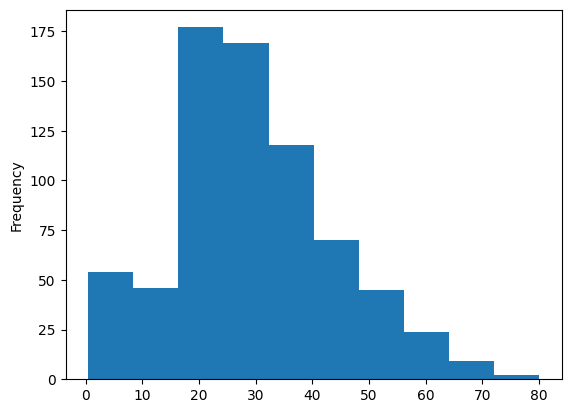

Pclass


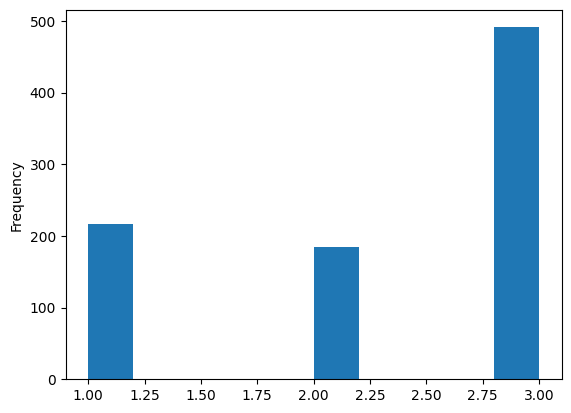

Sex


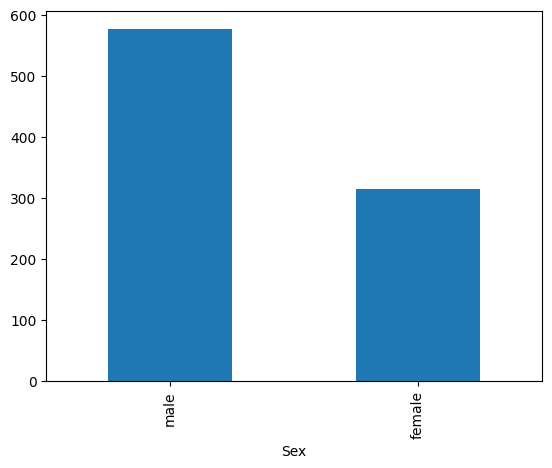

SibSp


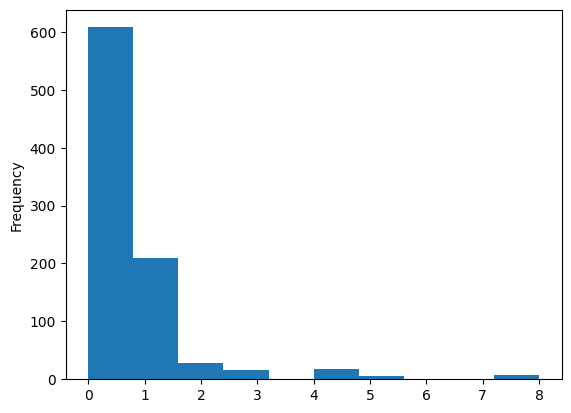

Parch


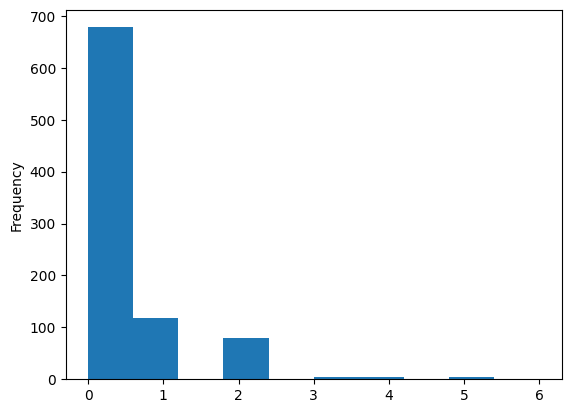

Fare


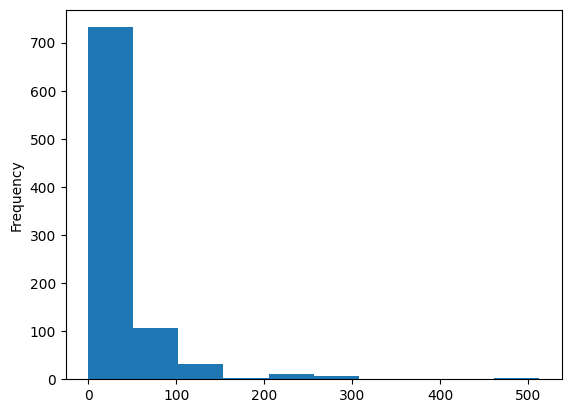

Embarked


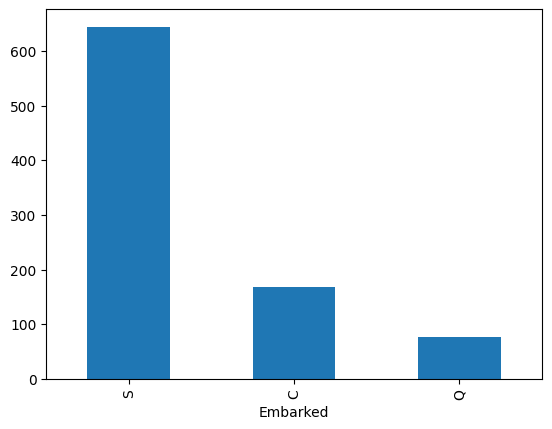

Ticket


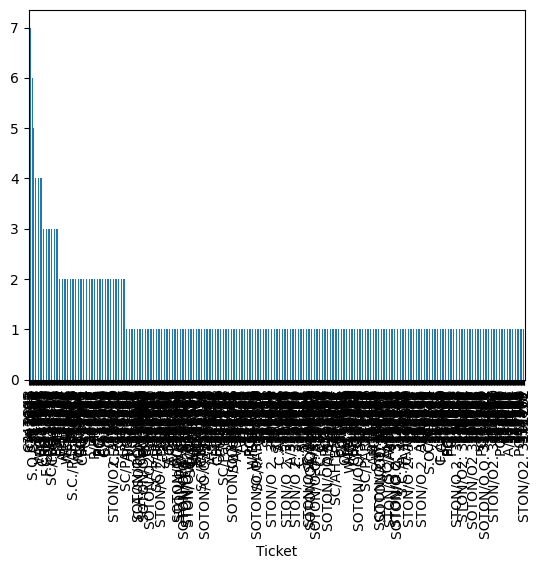

Cabin


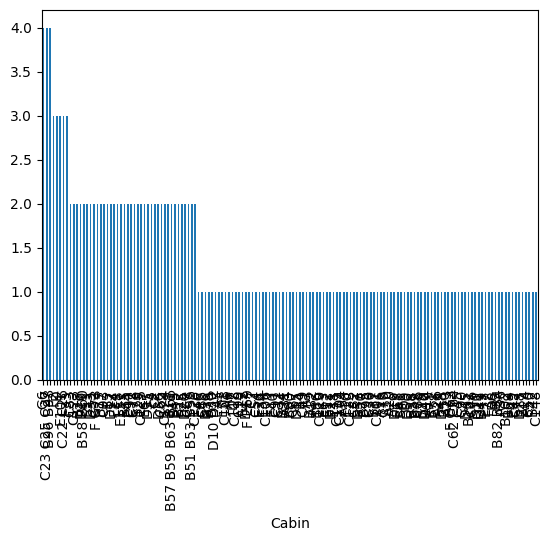

In [103]:
eda_plot_data(df)

In [ ]:
df = clean_df(df)

In [105]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1.0,0.0,0.271174,0.125,0.0,0.006826,0.014151,0.133901,1.0,0.0
1,0.0,1.0,0.472229,0.125,0.0,0.005675,0.139136,0.074458,0.0,1.0
2,1.0,1.0,0.321438,0.000,0.0,0.999989,0.015469,0.133901,1.0,1.0
3,0.0,1.0,0.434531,0.125,0.0,0.036695,0.103644,0.609537,1.0,1.0
4,1.0,0.0,0.434531,0.000,0.0,0.120417,0.015713,0.133901,1.0,0.0


In [106]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.352413,0.367921,0.065376,0.063599,0.095762,0.062858,0.133901,0.767717,0.383838
std,0.418036,0.477990,0.163383,0.137843,0.134343,0.211664,0.096995,0.099778,0.395599,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.271174,0.000000,0.000000,0.004615,0.015440,0.133901,0.500000,0.000000
50%,1.000000,0.000000,0.367921,0.000000,0.000000,0.036132,0.028213,0.133901,1.000000,0.000000
75%,1.000000,1.000000,0.434531,0.125000,0.000000,0.111914,0.060508,0.133901,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Age


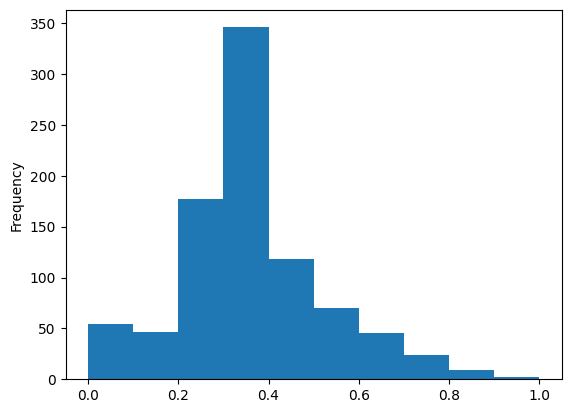

Pclass


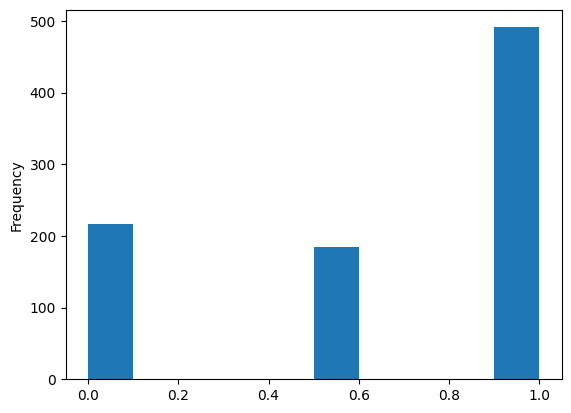

Sex


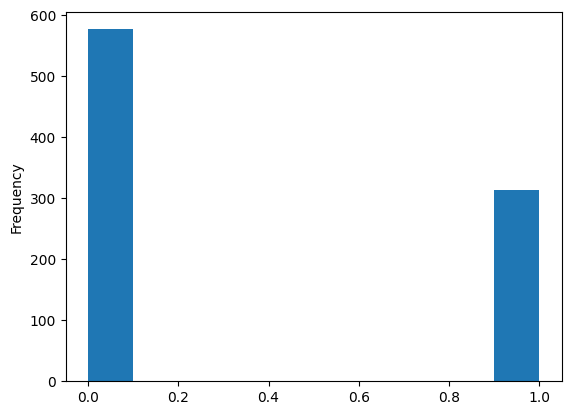

SibSp


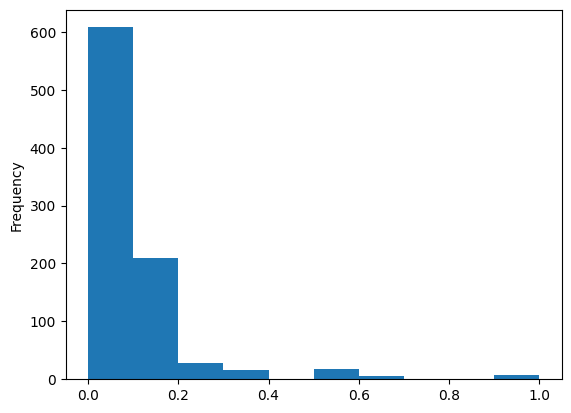

Parch


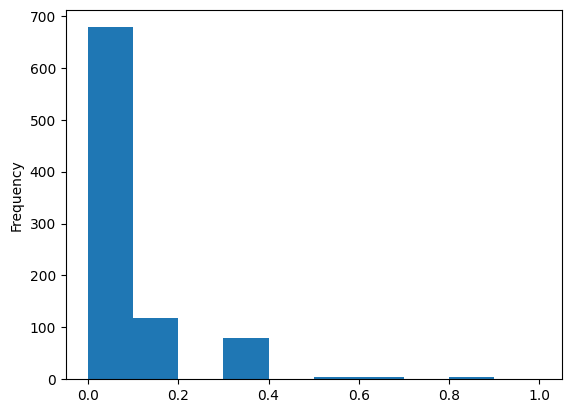

Fare


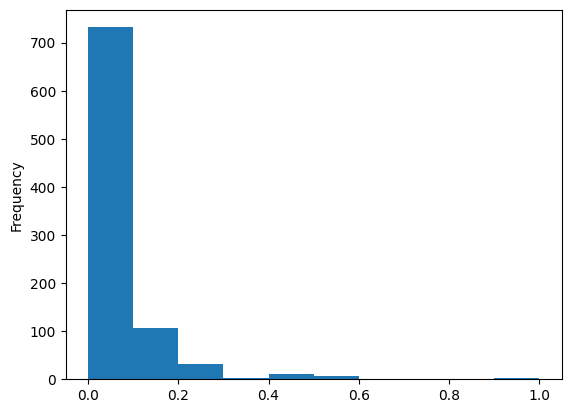

Embarked


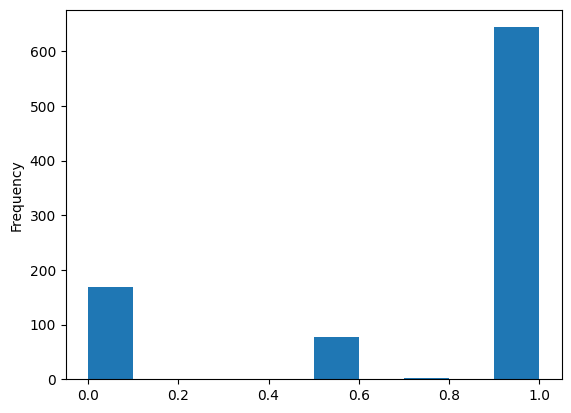

Ticket


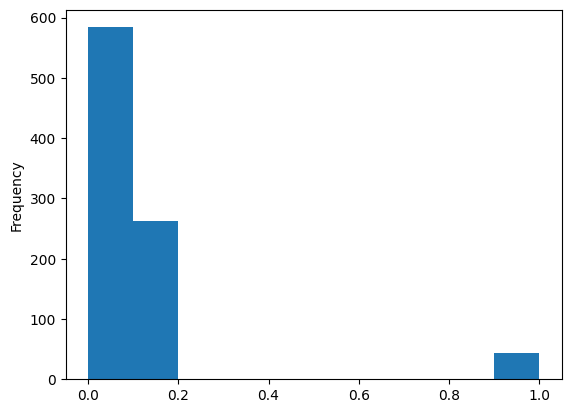

Cabin


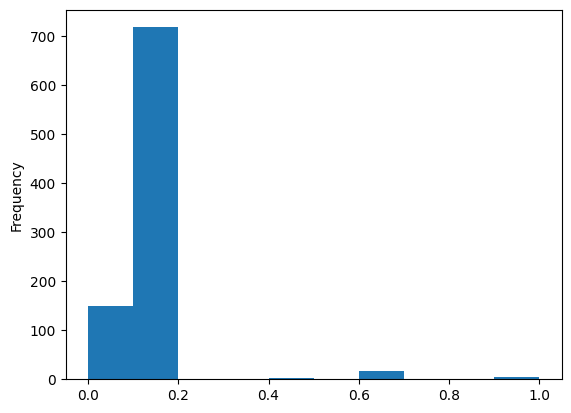

In [107]:
eda_plot_data(df, test=True)

In [108]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [109]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [110]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Age


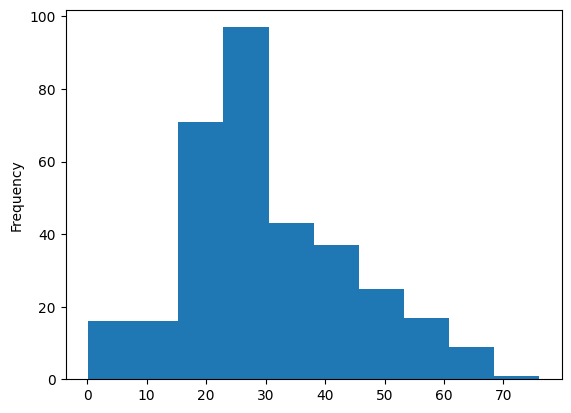

Pclass


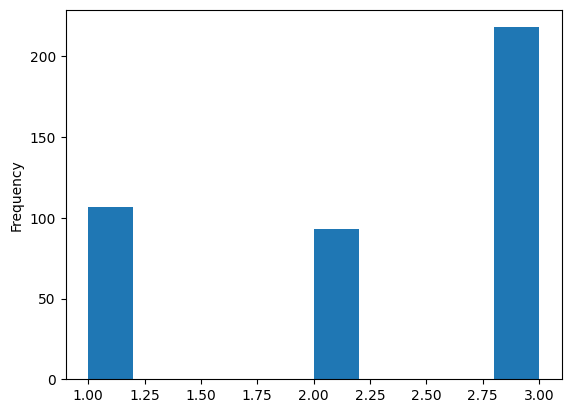

Sex


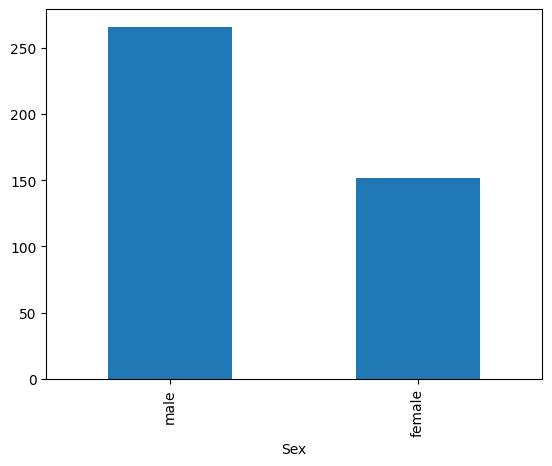

SibSp


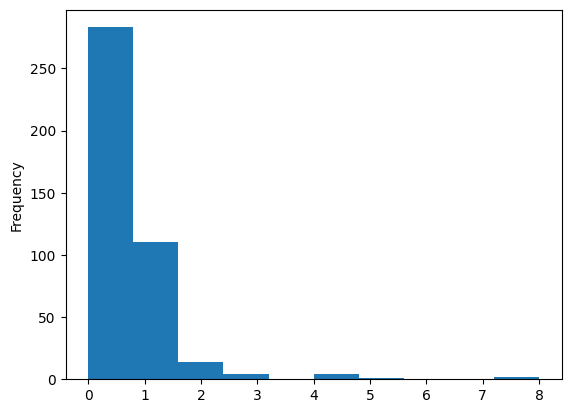

Parch


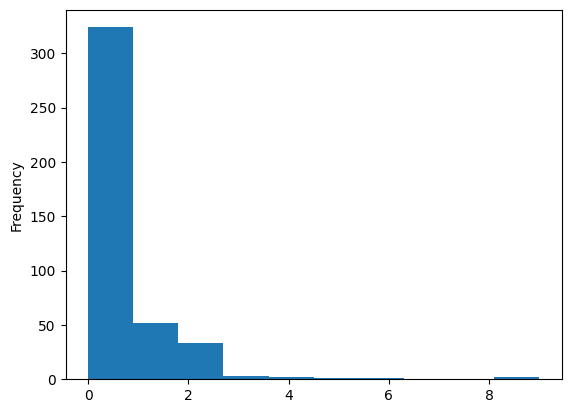

Fare


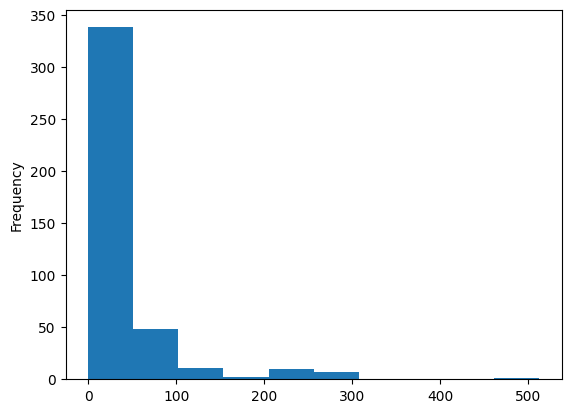

Embarked


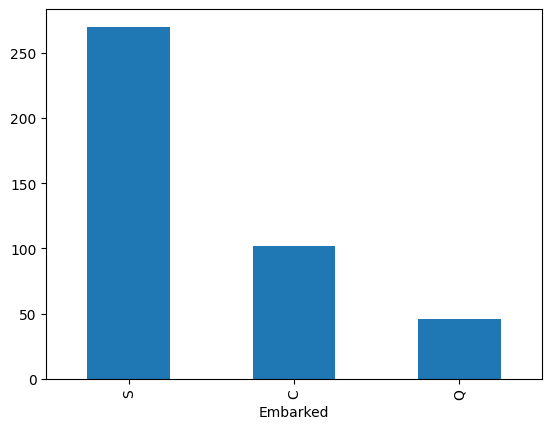

Ticket


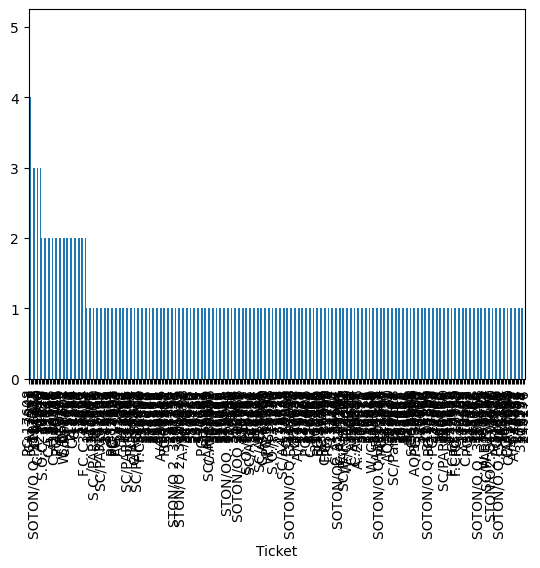

Cabin


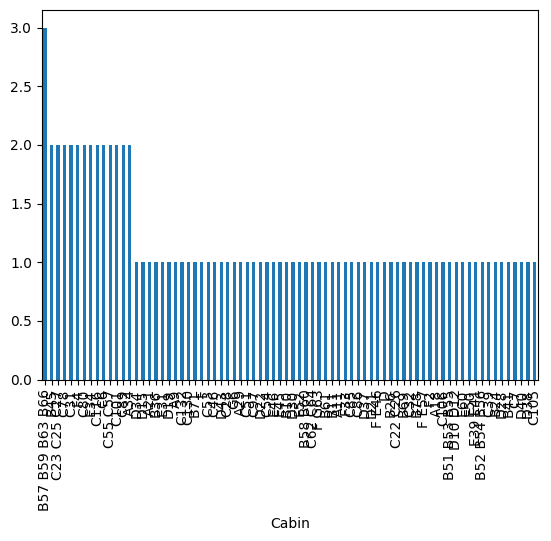

In [111]:
eda_plot_data(test_df)

In [ ]:
test_df = clean_df(test_df,test=True)

In [113]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,0.452723,0.000,0.000000,0.106700,0.015282,0.180209,0.5
1,1.0,1.0,0.617566,0.125,0.000000,0.117134,0.013663,0.180209,1.0
2,0.5,0.0,0.815377,0.000,0.000000,0.077475,0.018909,0.180209,0.5
3,1.0,0.0,0.353818,0.000,0.000000,0.101619,0.016908,0.180209,1.0
4,1.0,1.0,0.287881,0.125,0.111111,0.999995,0.023984,0.180209,1.0


In [114]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Sex       418 non-null    float64
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    float64
 4   Parch     418 non-null    float64
 5   Ticket    418 non-null    float64
 6   Fare      417 non-null    float64
 7   Cabin     418 non-null    float64
 8   Embarked  418 non-null    float64
dtypes: float64(9)
memory usage: 29.5 KB


In [115]:
test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,0.632775,0.363636,0.396975,0.055921,0.043594,0.081708,0.069540,0.180209,0.700957
std,0.420919,0.481622,0.166617,0.112095,0.109048,0.189496,0.109124,0.120250,0.427248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.301068,0.000000,0.000000,0.004355,0.015412,0.180209,0.500000
50%,1.000000,0.000000,0.396975,0.000000,0.000000,0.011481,0.028213,0.180209,1.000000
75%,1.000000,1.000000,0.469207,0.125000,0.000000,0.111404,0.061484,0.180209,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Age


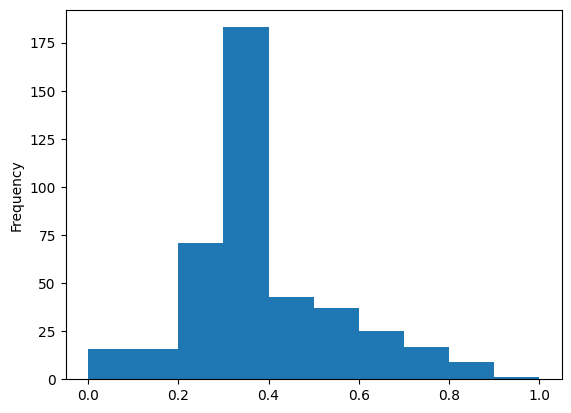

Pclass


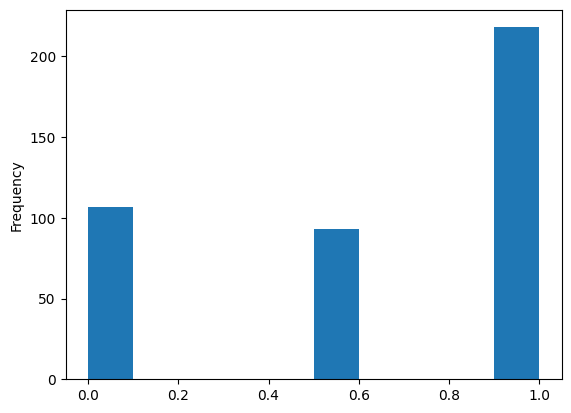

Sex


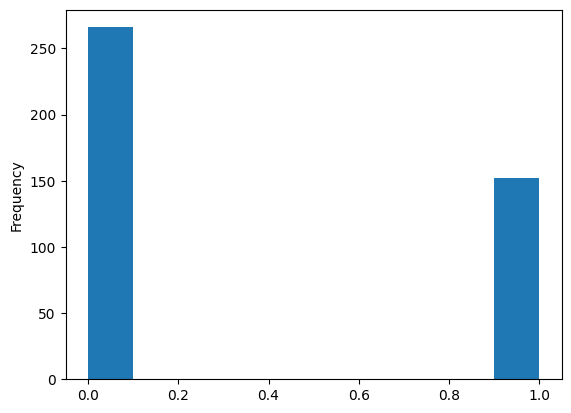

SibSp


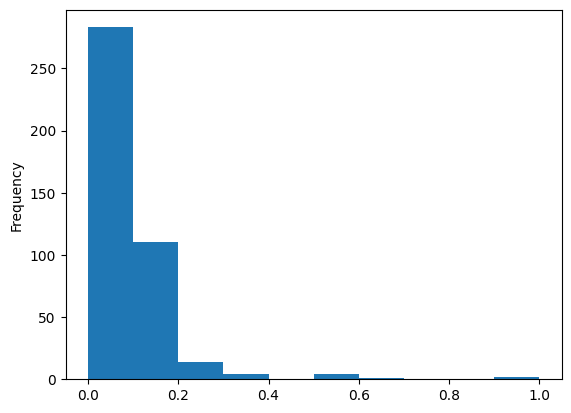

Parch


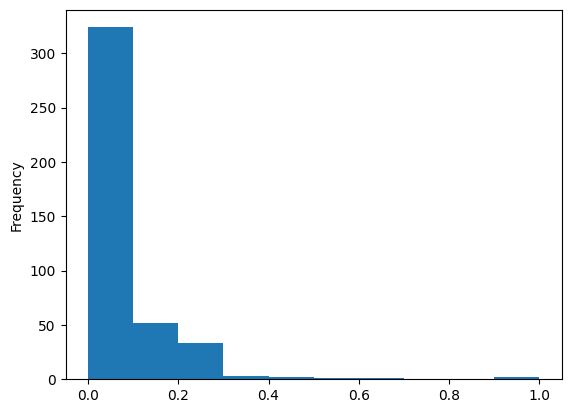

Fare


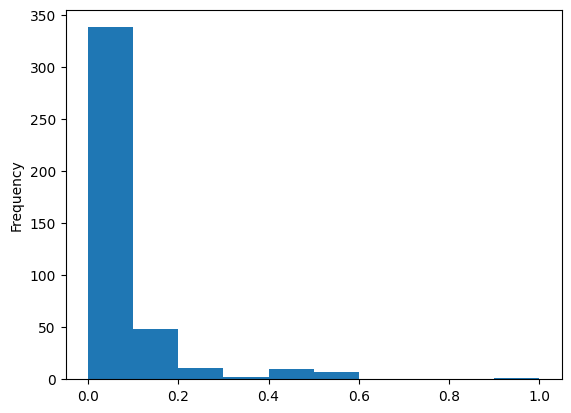

Embarked


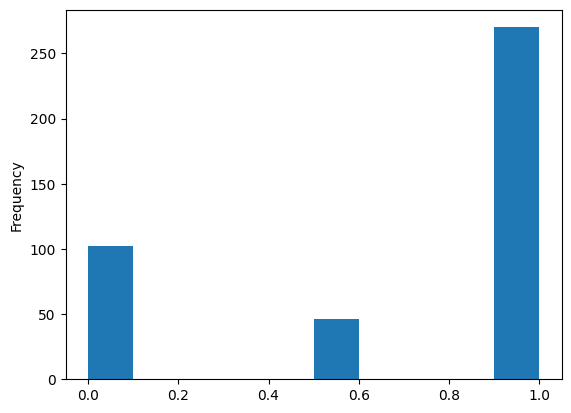

Ticket


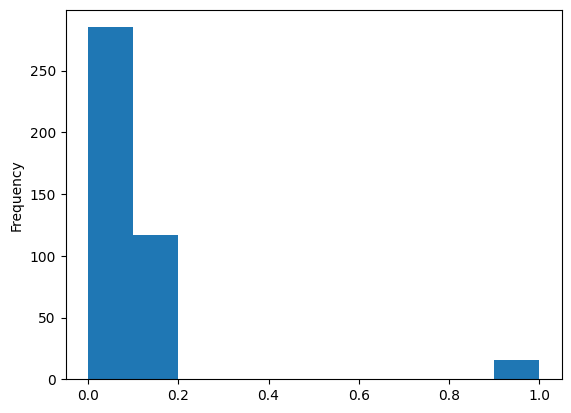

Cabin


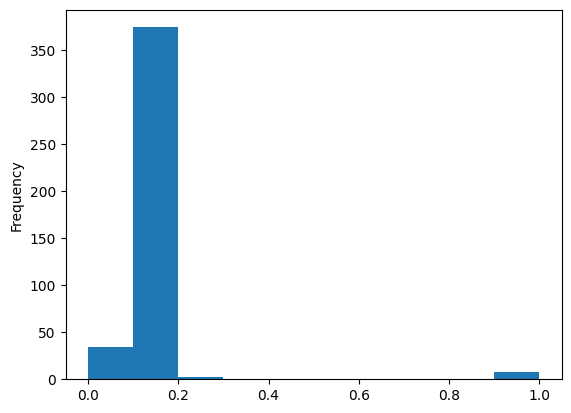

In [116]:
eda_plot_data(test_df,test=True)